In [1]:
!cp -r /kaggle/input/dataset20/rtdetr1 /kaggle/working/
# !cp -r /kaggle/input/dataset20/rtdetr1/RT-DETR /kaggle/working/
# !rm -r /kaggle/working/
# !rm -r /kaggle/input/dataset17/rtdetr

In [3]:
pip install -r /kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 110.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 86.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 100.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 102.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 72.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 10.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 32.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!python /kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/tools/train.py --config /kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_6x_coco.yml

^C
Traceback (most recent call last):
  File "/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/tools/train.py", line 9, in <module>
    import src.misc.dist as dist 
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/tools/../src/__init__.py", line 2, in <module>
    from . import data 
    ^^^^^^^^^^^^^^^^^^
  File "/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/tools/../src/data/__init__.py", line 2, in <module>
    from .coco import *
  File "/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/tools/../src/data/coco/__init__.py", line 1, in <module>
    from .coco_dataset import (
  File "/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/tools/../src/data/coco/coco_dataset.py", line 8, in <module>
    import torch
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 229, in <module>
    from torch._C import *  # noqa: F403
    ^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


In [7]:
!python /kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/tools/infer.py \
  -c /kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_6x_coco.yml \
  -r /kaggle/working/logs/checkpoint0004.pth \
  -f /kaggle/working/rtdetr1/dataset/val/images/uav0000117_02622_v/0000001.jpg \
  -d cuda



Load PResNet50 state_dict


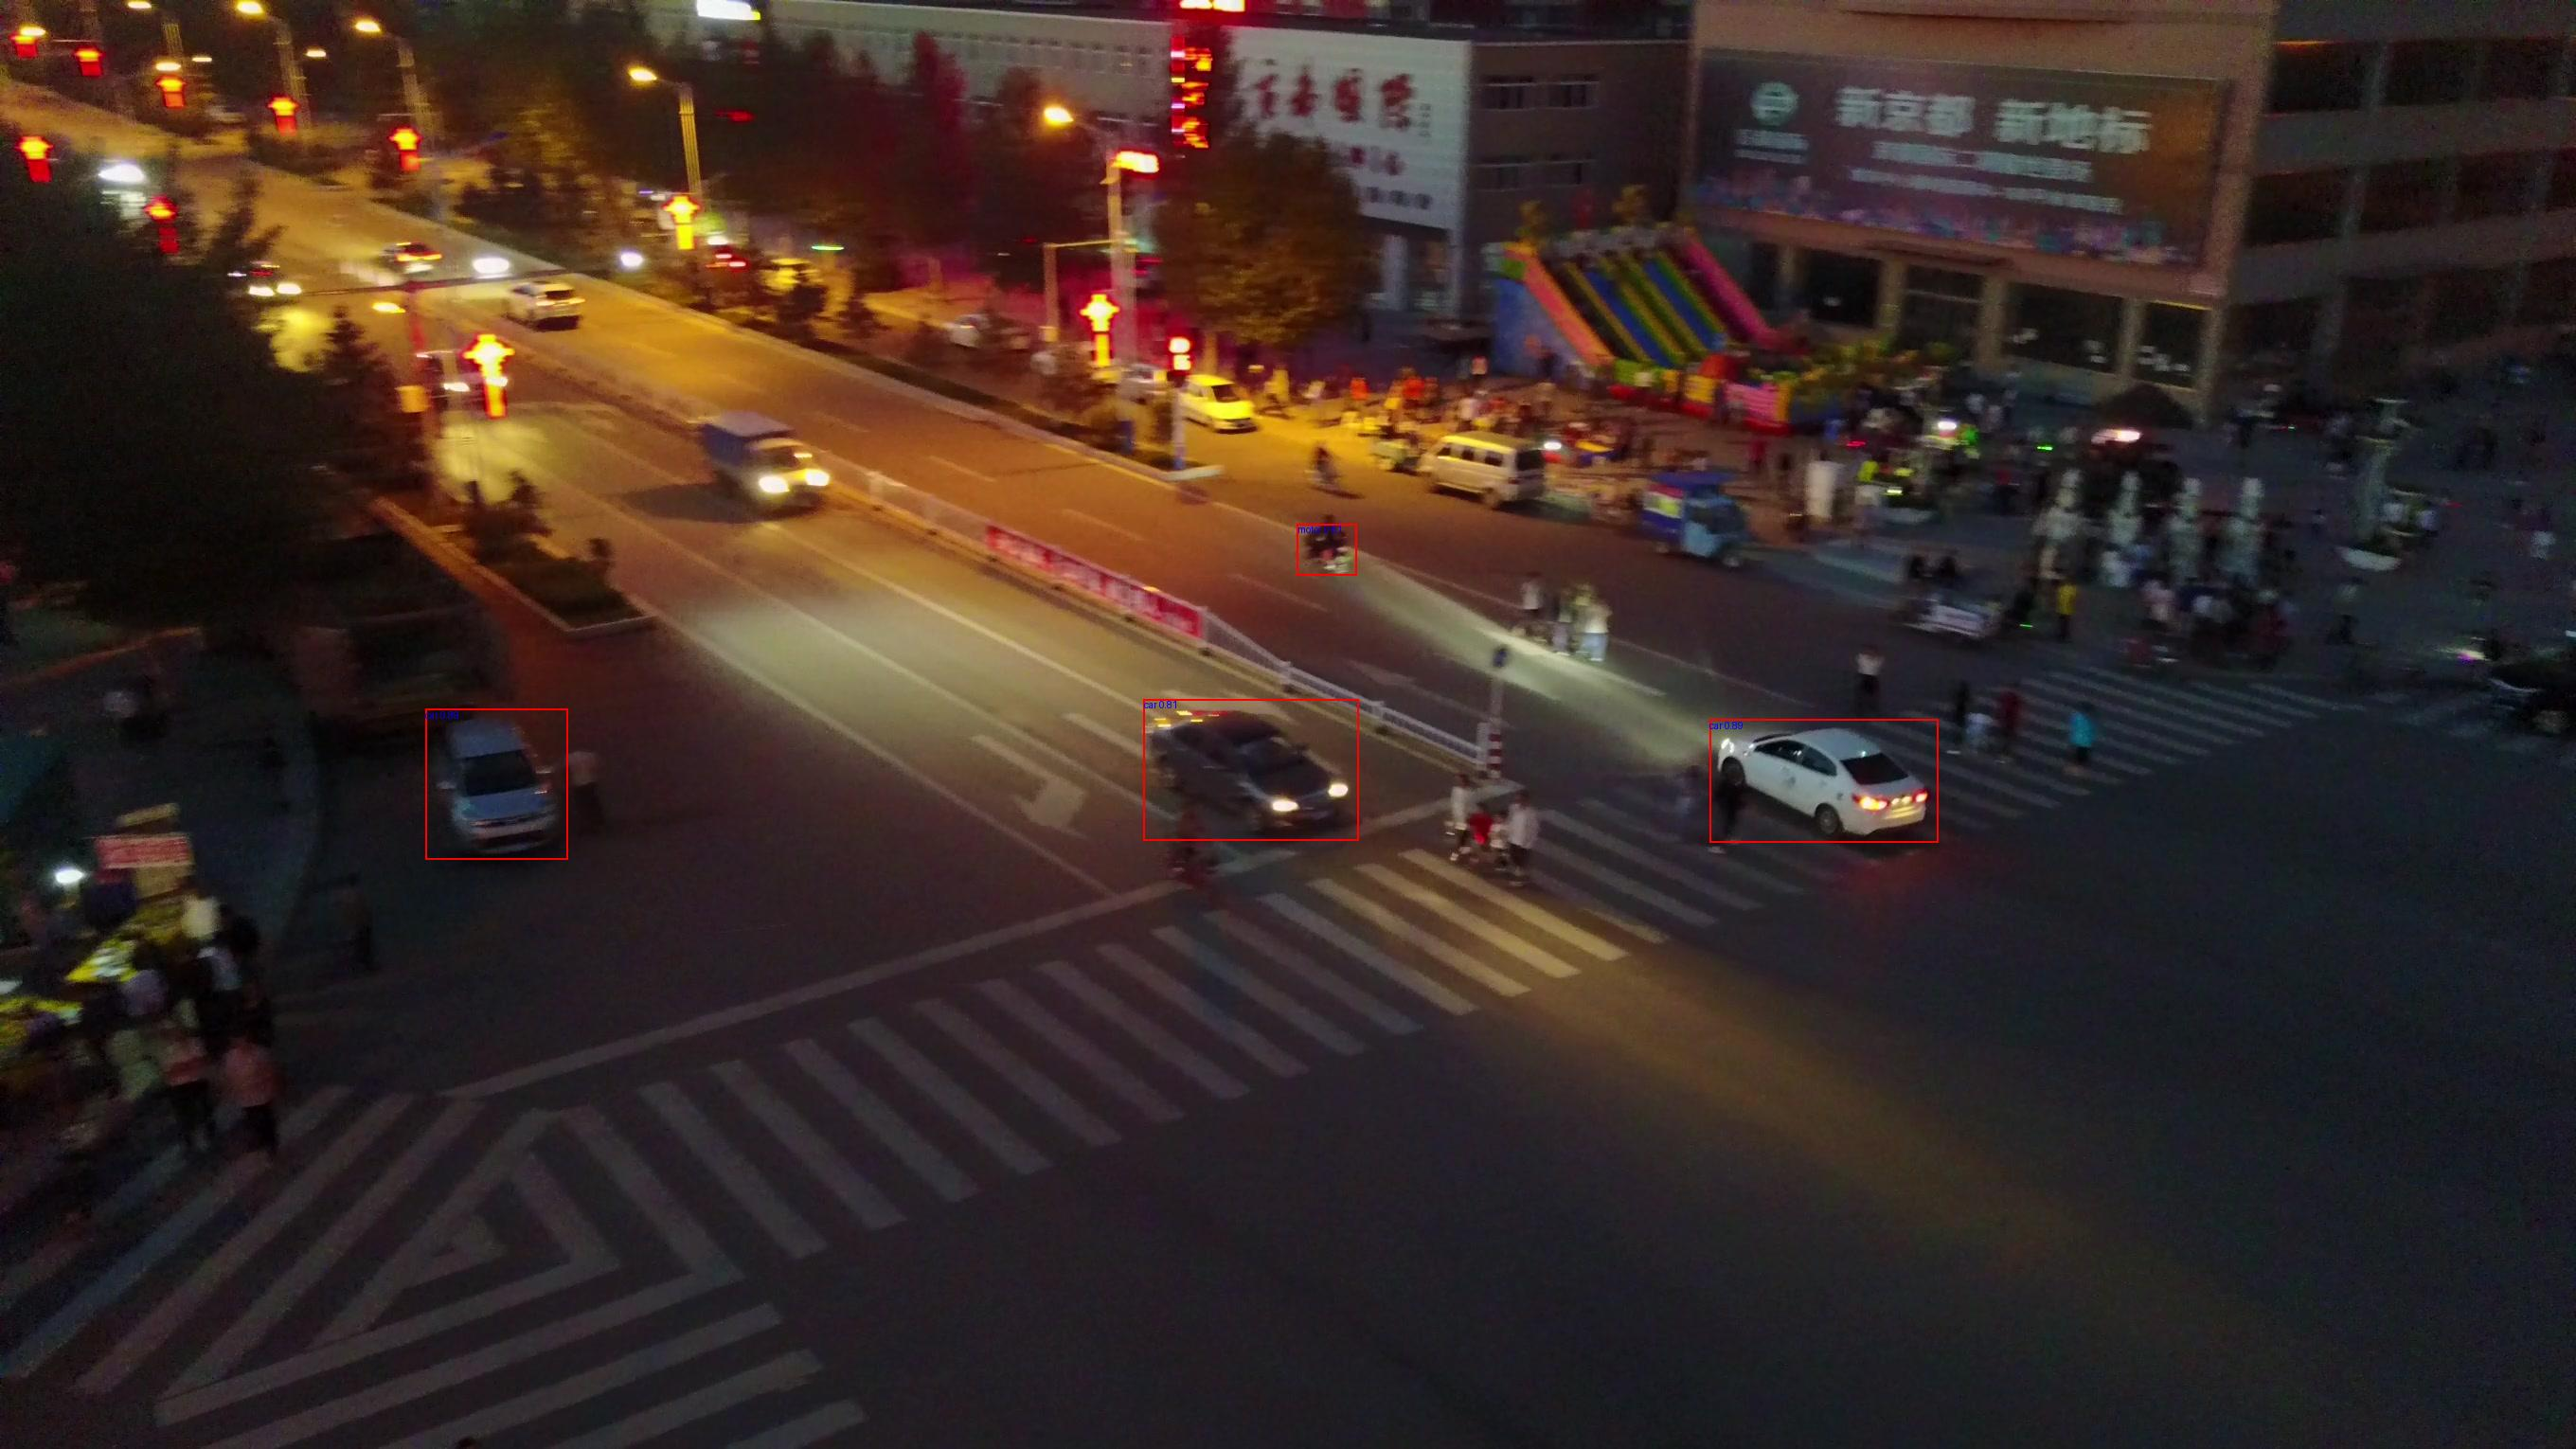

In [8]:
from PIL import Image
Image.open("results_0.jpg")

In [155]:
import yaml

def update_remap_flag(yaml_path, output_path=None):
    with open(yaml_path, 'r') as file:
        data = yaml.safe_load(file)

    # Modify the remap flag
    data['remap_mscoco_category'] = True

    # Save it back to the original or to a new file
    save_path = output_path if output_path else yaml_path
    with open(save_path, 'w') as file:
        yaml.safe_dump(data, file, sort_keys=False)

    print(f"Updated 'remap_mscoco_category' to False in {save_path}")

# Example usage
update_remap_flag('/kaggle/working/rtdetr/RT-DETR/rtdetr_pytorch/configs/dataset/coco_detection.yml')


Updated 'remap_mscoco_category' to False in /kaggle/working/rtdetr/RT-DETR/rtdetr_pytorch/configs/dataset/coco_detection.yml


In [28]:
import sys
sys.path.append('/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch')
from src.core import YAMLConfig
from src.solver.det_solver import DetSolver

cfg = YAMLConfig(
    cfg_path="/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_6x_coco.yml",
    tuning="/kaggle/working/logs/checkpoint0002.pth"
)

solver = DetSolver(cfg)
solver.val()  # This runs the evaluation




Load PResNet50 state_dict
Tuning checkpoint from /kaggle/working/logs/checkpoint0002.pth
Load model.state_dict, {'missed': [], 'unmatched': []}
loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
Test:  [  0/102]  eta: 0:04:54    time: 2.8911  data: 0.6840  max mem: 1469
Test:  [ 10/102]  eta: 0:01:40    time: 1.0924  data: 0.0924  max mem: 1477
Test:  [ 20/102]  eta: 0:01:19    time: 0.8795  data: 0.0337  max mem: 1477
Test:  [ 30/102]  eta: 0:01:07    time: 0.8557  data: 0.0333  max mem: 1477
Test:  [ 40/102]  eta: 0:00:58    time: 0.9141  data: 0.0339  max mem: 1477
Test:  [ 50/102]  eta: 0:00:49    time: 0.9500  data: 0.0347  max mem: 1477
Test:  [ 60/102]  eta: 0:00:40    time: 0.9791  data: 0.0342  max mem: 1477
Test:  [ 70/102]  eta: 0:00:30    time: 0.9329  data: 0.0334  max mem: 1477
Test:  [ 80/102]  eta: 0:00:20    time: 0.7998  data: 0.0326  max mem: 1477
Test:  [ 90/102]  eta: 0:00:10    time: 0.7305  data: 0.0335  max mem: 1477
Test:  [100/1

In [2]:
import yaml

def update_epoch_in_yaml(file_path, new_epoch_value=50):
    with open(file_path, 'r') as f:
        config = yaml.safe_load(f)  # Use safe_load here

    if 'epoches' in config:
        config['epoches'] = new_epoch_value
    elif 'epochs' in config:
        config['epochs'] = new_epoch_value

    with open(file_path, 'w') as f:
        yaml.dump(config, f)

# File paths
optimizer_file = '/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/configs/rtdetr/include/optimizer.yml'
runtime_file = '/kaggle/working/rtdetr1/RT-DETR/rtdetr_pytorch/configs/runtime.yml'

# Apply changes
update_epoch_in_yaml(optimizer_file, 50)
update_epoch_in_yaml(runtime_file, 50)

print("✅ Epochs updated to 50.0 in optimizer and runtime YAML files.")



✅ Epochs updated to 50.0 in optimizer and runtime YAML files.
